In [1]:
# From: https://medium.com/@harshit_tyagi/end-to-end-machine-learning-project-tutorial-part-1-ea6de9710c0

In [2]:
# !wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
features = ['MPG'
            , 'Cylinders'
            , 'Displacement'
            , 'Horsepower'
            , 'Weight'
            , 'Acceleration'
            , 'Model_Year'
            , 'Origin'
           ]
df = pd.read_csv('./auto-mpg.data'
                 , names = features
                 , na_values = '?'
                 , comment = '\t'
                 , sep = ' '
                 , skipinitialspace = True
                )
data = df.copy()

In [5]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### 1. Check for Data type of columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
data.shape

(398, 8)

### 2. Check for null values

In [8]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64

### 3. Check for outliers in horsepower column

In [9]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


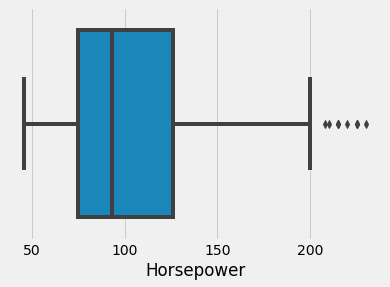

In [10]:
sns.boxplot(x=data.Horsepower)

In [11]:
median = data.Horsepower.median()
data.Horsepower = data.Horsepower.fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [12]:
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_Year      0
Origin          0
dtype: int64

### 4. Look for category distribution in categorical columns

In [13]:
data.Cylinders.value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [14]:
data.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [15]:
data.Model_Year.value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: Model_Year, dtype: int64

### 5. Plot for correlation

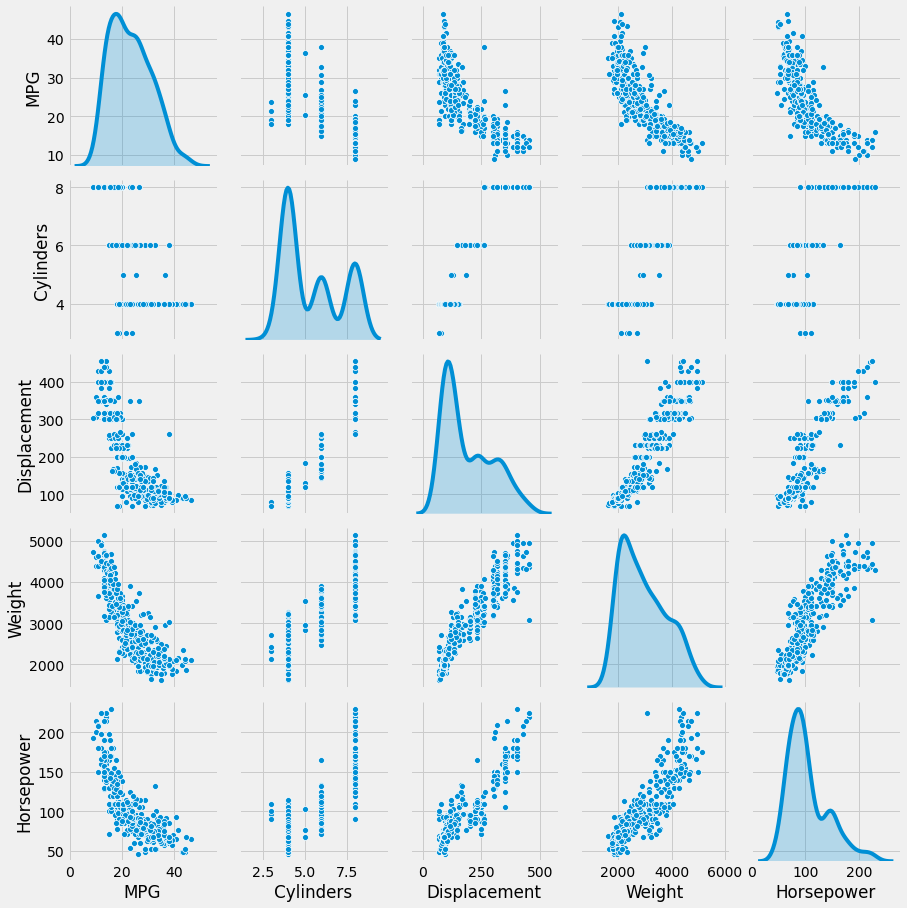

In [16]:
sns.pairplot(data[['MPG'
                   , 'Cylinders'
                   , 'Displacement'
                   , 'Weight'
                   , 'Horsepower'
                  ]]
             , diag_kind = 'kde'
            );

### 6. Reassign Origin Column

In [17]:
data.Origin = data.Origin.map({1: 'India'
                        , 2: 'USA'
                        , 3: 'Germany'
                       })
data.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin
143,26.0,4,97.0,78.0,2300.0,14.5,74,USA
209,19.0,4,120.0,88.0,3270.0,21.9,76,USA
300,23.9,8,260.0,90.0,3420.0,22.2,79,India
302,34.5,4,105.0,70.0,2150.0,14.9,79,India
135,18.0,6,225.0,105.0,3613.0,16.5,74,India
299,27.2,4,141.0,71.0,3190.0,24.8,79,USA
76,18.0,4,121.0,112.0,2933.0,14.5,72,USA
73,13.0,8,307.0,130.0,4098.0,14.0,72,India
22,25.0,4,104.0,95.0,2375.0,17.5,70,USA
103,11.0,8,400.0,150.0,4997.0,14.0,73,India


In [18]:
# One Hot Encoding

In [19]:
data = pd.get_dummies(data
                      , prefix = ''
                      , prefix_sep = ''
                     )
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Germany,India,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,1,0


### 7. Set aside the test data 

In [20]:
# split based on strata of data, in this case # of cylinders

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1
                               , test_size = 0.2
                               , random_state = 42
                              )

for train_index, test_index in split.split(data
                                           , data.Cylinders
                                          ):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]


In [22]:
# check train and test sets are the same percentage

In [23]:
strat_train_set.Cylinders.value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [24]:
strat_test_set.Cylinders.value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64